### Lab 1.1 Analysis

This notebook is where you should be calling functions from your (completed) incomplete_process.py to reduce your week 1 observations. A very barebones structure containing some useful commands and questions is included below. This will help you to reduce a SINGLE science observation. You should expand this notebook to reduce all of your science observations, using the appropriate calibration files.

You can also look at example_notebook.ipynb in materials/lab1.1/ for some basic commands that you may find useful.

**MAKE SURE YOU COPY THIS TO YOUR OWN WORKDIR BEFORE EDITING.**

Be sure to answer any other questions that are asked in Lab 1.1 in this notebook.

In [ ]:
#TODO written questions

In [1]:
# Import any modules you might need, including your incomplete_process.py
import numpy as np
import pyfits
import matplotlib.pylab as plt
from complete_process import * # This imports all of the functions in complete process
                                 # with their respective names
%matplotlib inline

In [2]:
# Name of the science observation
sciencefile= '/afs/ir.stanford.edu/class/physics100/workdir/u1/M51/2016-03-30_24in/B/M51_001B.fit'
# A path to a text file that lists the names of all of the flat field images
flatfilelist= '/afs/ir.stanford.edu/class/physics100/submissions/u1/czanoci/Lab1.1/M51flatB.txt'
# A path to a text file that lists the dark current image file names
darkfilelist= '/afs/ir.stanford.edu/class/physics100/submissions/u1/czanoci/Lab1.1/M51dark.txt'
# A path to a text file that lists the bias image file names
biasfilelist= '/afs/ir.stanford.edu/class/physics100/submissions/u1/czanoci/Lab1.1/M51bias.txt'
basename= 'M51_processed'# A string prefix for all of your output files

In [3]:
finalbias=AverageBias(biasfilelist) 
# Call your function from incomplete_process that computes the Average Bias 
# Run it on your biasfilelist
print 'Bias Image Created'
print finalbias.shape
# Does this shape make sense?
# Try changing the axis=0 to axis=1 and axis=None in your function and see
# how the shape changes

Bias Image Created
(512, 512)


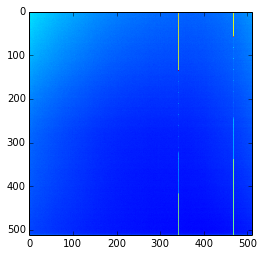

In [4]:
plt.imshow(finalbias) # Does the final bias look correct? 
# You may need to modify the plot options and/or ouput to a fits file (shown below) and
# investigate in ds9

In [5]:
finaldark=AverageDark(darkfilelist,finalbias)

print 'Dark Current Image Created'
print finaldark.shape #Compare this to the bias image shape. Must these
                      #be the same? What happens if they are not?

Dark Current Image Created
(512, 512)


In [6]:
finalflat=AverageFlat(flatfilelist,finalbias,finaldark)

rawdata=pyfits.open(sciencefile)[0] #This gets the 1st extension (starts
                      #with 0!) This is an example of using pyfits.open
                      #This is a FITS file object

15
15
11061.3043494
8929.8675
7167.40172278
6127.43477722
5668.82360254
4652.59422278
3373.05734937
2986.8439519
2304.15839746
1766.16484937
1280.66015063
1059.91274683
996.494873413
681.634729126
526.325451904


In [7]:
finalimage=ScienceExposure(rawdata,finalbias,finaldark,finalflat)

sciheader=rawdata.header #This grabs the header object from the FITS object rawdata

In [8]:
# Saving files as fits objects
newscience=basename+'_CleanScience.fits'  #Appending filenames onto the base
newbias=basename+'_Bias.fits'
newdark=basename+'_Master_Dark.fits'
newflat=basename+'_Master_Flat.fits'

sciencehdu=pyfits.PrimaryHDU(finalimage,header=sciheader)  #This converts
#a numpy array into a FITS object with a data block (finalimage) and a
#header (sciheader)

sciencehdu.writeto(newscience, clobber=True) #This writes the fits object
                      #to the file name newscience, which is defined
                      #above The clobber means to overwrite the file if it
                      #already exists.


biashdu=pyfits.PrimaryHDU(finalbias) #Further writing of files
biashdu.writeto(newbias, clobber=True)

darkhdu=pyfits.PrimaryHDU(finaldark)
darkhdu.writeto(newdark, clobber=True)

#Given the names and conventions, how do we write our final flat field
#image to the disk?
flathdu=pyfits.PrimaryHDU(finalflat)
flathdu.writeto(newflat, clobber=True)

Overwrite existing file 'M51_processed_CleanScience.fits'.
Overwrite existing file 'M51_processed_Bias.fits'.
Overwrite existing file 'M51_processed_Master_Dark.fits'.
Overwrite existing file 'M51_processed_Master_Flat.fits'.
